In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [18]:
res = np.load(os.path.join('./results/2409032239/models/pred.npy'), allow_pickle=True).item()
res

{'true_label': array([0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1,
        2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2,
        2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1,
        0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0,
        1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2,
        0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0,
        0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0,
        1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2,
        0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0,
        0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2,
        2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0,
        1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0,
        0, 0, 0, 0, 0, 0

In [21]:
y_true_bin = label_binarize(res['true_label'], classes=[0, 1, 2])
y_scores = res['predicted']
fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
roc_auc_micro

0.9102215107975731

In [7]:
fpr, tpr, thresholds = roc_curve(res['1'], res['0'])

ValueError: multiclass format is not supported

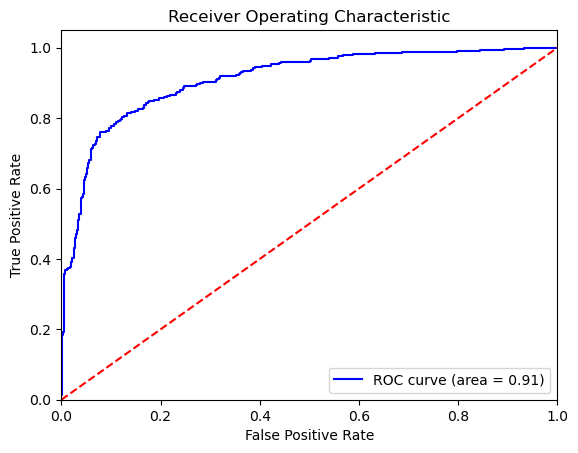

In [22]:
plt.figure()
plt.plot(fpr_micro, tpr_micro, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_micro)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 